<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/' # Put url in variable

In [0]:
# Import beautiful soup and requests
import bs4
import requests

result = requests.get(url) # get results from url and store it in variable

In [81]:
result # Response 200 means succesful, 404 means error, offline, missing etc.

<Response [200]>

In [82]:
type(result)

requests.models.Response

In [83]:
result.text # returns a long string of html from the url

'<!doctype html>\n<html>\n\r\n<!-- Mirrored from us.pycon.org/2018/schedule/talks/list/ by HTTrack Website Copier/3.x [XR&CO\'2014], Tue, 10 Jul 2018 13:45:12 GMT -->\r\n<!-- Added by HTTrack --><meta http-equiv="content-type" content="text/html;charset=utf-8" /><!-- /Added by HTTrack -->\r\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2018 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2018/site_media/static/css/slight.a3c1b1430280.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" href="/2018/site_media/static/cache/css/411162ab63b1.css" type="text/css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2018/sit

In [84]:
type(result.text)

str

In [85]:
soup = bs4.BeautifulSoup(result.text) # Returns html in different form
soup

<!DOCTYPE html>
<html>
<!-- Mirrored from us.pycon.org/2018/schedule/talks/list/ by HTTrack Website Copier/3.x [XR&CO'2014], Tue, 10 Jul 2018 13:45:12 GMT -->
<!-- Added by HTTrack --><head><meta content="text/html;charset=utf-8" http-equiv="content-type"/><!-- /Added by HTTrack -->
<title>Talks | PyCon 2018 in Cleveland, Ohio</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet"/>
<link href="/2018/site_media/static/css/slight.a3c1b1430280.css" media="all" rel="stylesheet" type="text/css"/>
<link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
<link href="/2018/site_media/static/cache/css/411162ab63b1.css" rel="stylesheet" type="text/css"/>
<link href="/2018/site_media/static/css/simple-grid.d1149de00d41.css" media="all" rel="stylesheet" type="text/css"/>
<meta content="/2018/site_media/st

In [86]:
type(soup)

bs4.BeautifulSoup

In [87]:
soup.select('h2') # selecting just the speech titles by referencing 'h2' from html

[<h2>
 <a href="/2018/schedule/presentation/127/" id="presentation-127">
         A Bit about Bytes: Understanding Python Bytecode
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/81/" id="presentation-81">
         Adapting from Spark to Dask: what to expect
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/152/" id="presentation-152">
         All in the timing: How side channel attacks work
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/84/" id="presentation-84">
         Analyzing Data: What pandas and SQL Taught Me About Taking an Average
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/96/" id="presentation-96">
         A practical guide to Singular Value Decomposition in Python
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/71/" id="presentation-71">
         Augmenting Human Decision Making with Data Science
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/159/" id="presentation-159">
      

In [88]:
type(soup.select('h2')) # in the form of list

list

In [89]:
len(soup.select('h2')) # length of series

95

In [90]:
first = soup.select('h2')[0] # the first element of the list
first

<h2>
<a href="/2018/schedule/presentation/127/" id="presentation-127">
        A Bit about Bytes: Understanding Python Bytecode
      </a>
</h2>

In [91]:
type(first)

bs4.element.Tag

In [92]:
first.text

'\n\n        A Bit about Bytes: Understanding Python Bytecode\n      \n'

In [93]:
type(first.text)

str

In [94]:
first.text.strip() # Get rid of the extra space in the title

'A Bit about Bytes: Understanding Python Bytecode'

In [95]:
last = soup.select('h2')[-1] # show last element of list
last

<h2>
<a href="/2018/schedule/presentation/80/" id="presentation-80">
        You're an expert. Here's how to teach like one.
      </a>
</h2>

In [96]:
last.text.strip() # get rid of the spaces for the last element

"You're an expert. Here's how to teach like one."

In [0]:
titles = []

# create a for loop to strip all titles of extra spaces
for tag in soup.select('h2'):
  tag.text.strip()
  titles.append(titles)
  
# Do for loop with simpler list comprehension  
titles = [tag.text.strip() for tag in soup.select('h2')] 

In [98]:
type(titles), len(titles) # show type and length

(list, 95)

In [99]:
titles[0], titles[-1] # show first and last element in list

('A Bit about Bytes: Understanding Python Bytecode',
 "You're an expert. Here's how to teach like one.")

In [100]:
len(titles[0]) # show character length of first title in list

48

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [101]:
# Get titles that are longer than 80 characters
for title in titles:
  if len(title) > 80:
    print(title)

Code like an accountant: Designing data systems for accuracy, resilience and auditability
Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus
How we designed an inclusivity-first conference on a shoestring budget and short timeline
Listen, Attend, and Walk : Interpreting natural language navigational instructions
The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications


In [102]:
# Same as above but appending to a list
long_titles = []
for title in titles:
  if len(title) > 80:
    long_titles.append(title)
    
long_titles

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 2. List Comprehension

In [103]:
# Same as above but in list comprehension form
[title for title in titles if len(title) > 80]

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 3. Filter with named function

In [104]:
# Same as above but with filter funtion
def long(title):
  return len(title) > 80

list(filter(long, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 4. Filter with anonymous function

In [105]:
# Same as above but in anonymous function form -- not the most ideal
list(filter(lambda t: len(t) > 80, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200 # Displaying a long column width

In [107]:
df = pd.DataFrame({'title': titles}) # creating df with column name and titles
df[df.title.str.len() > 80] # displaying only title longer than 80 chars

,title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability"
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions"
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications


In [108]:
df.head()

,title
0,A Bit about Bytes: Understanding Python Bytecode
1,Adapting from Spark to Dask: what to expect
2,All in the timing: How side channel attacks work
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average
4,A practical guide to Singular Value Decomposition in Python


In [109]:
df.tail()

,title
90,Visual Testing with PyCharm and pytest
91,What is a Python Core Developer?
92,"""WHAT IS THIS MESS?"" - Writing tests for pre-existing code bases"
93,Win back lovely API: GraphQL in Python
94,You're an expert. Here's how to teach like one.


In [110]:
df.title.str.len() > 80 # show whether true or false for each element in list

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
      ...  
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78     True
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
90    False
91    False
92    False
93    False
94    False
Name: title, Length: 95, dtype: bool

In [111]:
condition = df.title.str.len() > 80
df[condition] # same as above but with the condition variable

,title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability"
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions"
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
df['title length'] = df.title.apply(len) # make a new column with the char length of titles

In [113]:
df.head()

,title,title length
0,A Bit about Bytes: Understanding Python Bytecode,48
1,Adapting from Spark to Dask: what to expect,43
2,All in the timing: How side channel attacks work,48
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69
4,A practical guide to Singular Value Decomposition in Python,59


In [114]:
df[df['title length'] > 80] # show char lengths greater than 80

,title,title length
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability",89
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus,100
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline,89
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions",82
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications,84


In [115]:
df.loc[df['title length'] > 80, 'title'] # Same as above but just showing the titles

19               Code like an accountant: Designing data systems for accuracy, resilience and auditability
28    Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus
46               How we designed an inclusivity-first conference on a shoestring budget and short timeline
51                      Listen, Attend, and Walk : Interpreting natural language navigational instructions
78                    The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications
Name: title, dtype: object

In [116]:
df.loc[df['title length'] > 80, 'title length'] # same as above but just showing title lengths

19     89
28    100
46     89
51     82
78     84
Name: title length, dtype: int64

### long title

In [0]:
df['long title'] = df['title length'] > 80 # create column that has true if title char length is above 80

In [118]:
df[df['long title']==True] # show the columns with True

,title,title length,long title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability",89,True
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus,100,True
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline,89,True
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions",82,True
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications,84,True


### first letter

In [119]:
# experiment that returns the first letter of a string
title = 'Debugging PySpark'
first_letter = title[0]
first_letter

'D'

In [0]:
df['first letter'] = df.title.str[0] # creating column with first letter of title

In [121]:
df[df['first letter'] == 'P'] # show rows with fist letter P

,title,title length,long title,first letter
55,Performance Python: Seven Strategies for Optimizing Your Numerical Code,71,False,P
56,Pipenv: The Future of Python Dependency Management,50,False,P
57,Practical Sphinx,16,False,P
58,Programming microbes using Python,33,False,P
59,Pumping up Python modules using Rust,36,False,P
60,Python 2 to 3: How to Upgrade and What Features to Start Using,62,False,P
61,Python 3: ten years later,25,False,P
62,Python across the USA: This is the Bus.,39,False,P
63,Python Data Sonification for Science and Discovery,50,False,P
64,Python for the quantum computing age,36,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [122]:
!pip install textstat # intall textstat to further evaluate strings in df

In [0]:
import textstat

In [124]:
# Display first and last element in list to count words
first = df.title.values[0]
last = df.title.values[-1]

first, last

('A Bit about Bytes: Understanding Python Bytecode',
 "You're an expert. Here's how to teach like one.")

In [125]:
# The count looks accurate
textstat.lexicon_count(first), textstat.lexicon_count(last)

(7, 9)

In [0]:
# Create new column by applying the textstat.lexicon_count function
df['title word count'] = df.title.apply(textstat.lexicon_count)

In [127]:
df[df['title word count'] <=3] # Showing titles of 3 words or less

,title,title length,long title,first letter,title word count
6,Automating Code Quality,23,False,A,3
8,Behavior-Driven Python,22,False,B,2
21,Coding through Adversity,24,False,C,3
52,Love your bugs,14,False,L,3
57,Practical Sphinx,16,False,P,2
76,Taking Django Async,19,False,T,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
# renaming column for more clarity
df = df.rename(columns={'title length': 'title character count'})

In [129]:
df.columns

Index(['title', 'title character count', 'long title', 'first letter',
       'title word count'],
      dtype='object')

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [130]:
df.describe()

,title character count,title word count
count,95.000000,95.000000
mean,46.442105,7.189474
std,17.560664,2.903757
min,14.000000,2.000000
25%,35.000000,5.000000
50%,45.000000,7.000000
75%,56.000000,9.000000
max,100.000000,19.000000


In [131]:
df.describe(include = 'all') # describe non-numeric columns too

,title,title character count,long title,first letter,title word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,21,NaN
top,Effortless Logging: A deep dive into the logging module,NaN,False,P,NaN
freq,1,NaN,90,12,NaN
mean,NaN,46.442105,NaN,NaN,7.189474
std,NaN,17.560664,NaN,NaN,2.903757
min,NaN,14.000000,NaN,NaN,2.000000
25%,NaN,35.000000,NaN,NaN,5.000000
50%,NaN,45.000000,NaN,NaN,7.000000
75%,NaN,56.000000,NaN,NaN,9.000000


In [132]:
import numpy as np
df.describe(exclude=np.number) # just describe non-numeric columns

,title,long title,first letter
count,95,95,95
unique,95,2,21
top,Effortless Logging: A deep dive into the logging module,False,P
freq,1,90,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [133]:
df.sort_values(by='title character count').head() # sort character count in acending order

,title,title character count,long title,first letter,title word count
52,Love your bugs,14,False,L,3
77,The AST and Me,14,False,T,4
57,Practical Sphinx,16,False,P,2
76,Taking Django Async,19,False,T,3
44,HOWTO Write a Function,22,False,H,4


Titles sorted reverse alphabetically

In [0]:
df['first letter'] = df['first letter'].str.upper() # making the first letter column in Caps

In [135]:
df.sort_values(by='first letter', ascending=False) # sort first letter in descending order

,title,title character count,long title,first letter,title word count
94,You're an expert. Here's how to teach like one.,47,False,Y,9
93,Win back lovely API: GraphQL in Python,38,False,W,7
91,What is a Python Core Developer?,32,False,W,6
90,Visual Testing with PyCharm and pytest,38,False,V,6
89,Visualizing Algorithms with Python and Programmable LEDs,56,False,V,7
88,Using Python to build an AI to play and win SNES StreetFighter II,65,False,U,13
87,User focused API Design,23,False,U,4
81,The Journey Over the Intermediate Gap,37,False,T,6
76,Taking Django Async,19,False,T,3
77,The AST and Me,14,False,T,4


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [136]:
df[df['first letter']=='""']

,title,title character count,long title,first letter,title word count


In [137]:
df['first letter'].value_counts().sort_index() # sort value counts alphabetically

"     1
A     7
B    11
C     8
D     7
E     5
F     3
G     2
H     5
I     2
L     3
O     2
P    12
R     3
S     6
T    11
U     2
V     2
W     2
Y     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [138]:
df['long title'].value_counts() / len(df)

False    0.947368
True     0.052632
Name: long title, dtype: float64

In [139]:
df['long title'].value_counts(normalize = True)

False    0.947368
True     0.052632
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

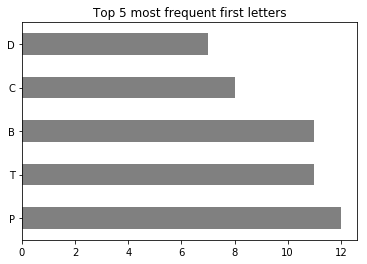

In [140]:
%matplotlib inline

(df['first letter'].value_counts().head(5)).plot.barh(color='grey', title= 'Top 5 most frequent first letters')

Histogram of title lengths, in characters

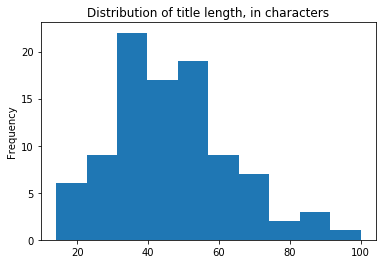

In [141]:
title = 'Distribution of title length, in characters'
df['title character count'].plot.hist(title=title)

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [0]:
soup.select('.presentation-description') # Parse html to get a list of descriptions

In [143]:
len(soup.select('.presentation-description')) # Check length of desciptions to match df

95

In [144]:
first1 = soup.select('.presentation-description')[0]
first1 # Look at first element in descriptions list

<div class="presentation-description">At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in those files? Well, wonder no more! In this talk you'll learn what Python bytecode is and how it's used to execute your code, as well as how to decipher and read it, and how to reason about bytecode to understand the performance of your Python code.</div>

In [145]:
first1.text.strip() # Show example of first element stripped

"At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in those files? Well, wonder no more! In this talk you'll learn what Python bytecode is and how it's used to execute your code, as well as how to decipher and read it, and how to reason about bytecode to understand the performance of your Python code."

In [147]:
# Use list comprehension to strip all descriptions and store in a list
descriptions = [tag.text.strip() for tag in soup.select('.presentation-description')]
len(descriptions)

95

In [155]:
se = pd.Series(descriptions) # Create pandas series of descriptions
df['description'] = se.values # Add description column to df
df.head()

,title,title character count,long title,first letter,title word count,description,description character count,description word count
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,7,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440,78
1,Adapting from Spark to Dask: what to expect,43,False,A,8,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881,141
2,All in the timing: How side channel attacks work,48,False,A,9,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647,96
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,False,A,12,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080,178
4,A practical guide to Singular Value Decomposition in Python,59,False,A,9,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147,188


In [152]:
df['description'][4] # Look at fourth element to investigate peculiar characters

'Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In the world of Netflix, this means recommending similar movies to the ones you have seen. In the world of dating, this means suggesting matches similar to people you already showed interest in!\r\n\r\nMy path to recommenders has been an unusual one: from a Software Engineer to working on matching algorithms at a dating company, with a little background on machine learning. With my knowledge of Python and the use of basic SVD (Singular Value Decomposition) frameworks, I was able to understand SVDs from a practical standpoint of what you can do with them, instead of focusing on the science.\r\n\r\nIn my talk, you will learn 2 practical ways of generating recommendations using SVDs: matrix factorization and item similarity. We will be learning the high-level components of SVD the "doer way": we wi

In [153]:
# Create column with description character counts
df['description character count'] = df['description'].apply(len)
df.head()

,title,title character count,long title,first letter,title word count,description,description character count
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,7,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440
1,Adapting from Spark to Dask: what to expect,43,False,A,8,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881
2,All in the timing: How side channel attacks work,48,False,A,9,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,False,A,12,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080
4,A practical guide to Singular Value Decomposition in Python,59,False,A,9,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147


In [154]:
# Create column with description word counts
df['description word count'] = df['description'].apply(textstat.lexicon_count)
df.head()

,title,title character count,long title,first letter,title word count,description,description character count,description word count
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,7,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440,78
1,Adapting from Spark to Dask: what to expect,43,False,A,8,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881,141
2,All in the timing: How side channel attacks work,48,False,A,9,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647,96
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,False,A,12,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080,178
4,A practical guide to Singular Value Decomposition in Python,59,False,A,9,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147,188


In [168]:
# Create column with flesch-kincaid grade levels for descriptions
df['description grade level'] = df['description'].apply(textstat.flesch_kincaid_grade)
df.head()

,title,title character count,long title,first letter,title word count,description,description character count,description word count,description grade level
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,7,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440,78,7.4
1,Adapting from Spark to Dask: what to expect,43,False,A,8,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881,141,14.3
2,All in the timing: How side channel attacks work,48,False,A,9,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647,96,11.9
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,False,A,12,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080,178,16.0
4,A practical guide to Singular Value Decomposition in Python,59,False,A,9,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147,188,18.0


In [157]:
# Describing only numeric values
df.describe()

# Description word count:
#    Average: 134.6
#    Minimum: 35
#    Maximum: 436

,title character count,title word count,description character count,description word count,description grade level
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,46.442105,7.189474,846.063158,134.578947,18.117895
std,17.560664,2.903757,450.107713,70.019082,15.835652
min,14.000000,2.000000,201.000000,35.000000,3.700000
25%,35.000000,5.000000,550.000000,91.500000,10.500000
50%,45.000000,7.000000,758.000000,119.000000,13.800000
75%,56.000000,9.000000,978.000000,149.500000,17.950000
max,100.000000,19.000000,2794.000000,436.000000,107.800000


In [158]:
# Describing only non-numeric values -- Doesn't tell us much
df.describe(exclude=np.number)

,title,long title,first letter,description
count,95,95,95,95
unique,95,2,20,95
top,Effortless Logging: A deep dive into the logging module,False,P,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re..."
freq,1,90,12,1


In [159]:
# Show all descriptions that could fit in a Tweet
df[df['description character count'] <= 280]

# There are only 3

,title,title character count,long title,first letter,title word count,description,description character count,description word count,description grade level
44,HOWTO Write a Function,22,False,H,4,A function is a small chunk of code that does useful work. Your job when writing a function is to do it in a way that it easy to read. Based on over 15 years of code reviews here are some tips and...,231,49,3.7
62,Python across the USA: This is the Bus.,39,False,P,8,"For 2 years, a family of three has traveled on a converted school bus from conference to conference, building tooling for the road in Python and visiting Python families in every corner of the cou...",201,35,15.8
65,"Python, Locales and Writing Systems",35,False,P,5,"Python 3 removes a lot of the confusion around Unicode handling in Python, but that by no means fixes everything. Different locales and writing systems have unique behaviours that can trip you up....",262,45,6.8


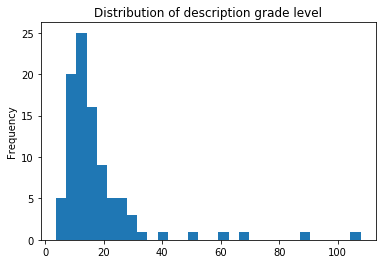

In [163]:
# Plot hist of flesch-kincaid grade levels
title = 'Distribution of description grade level'
df['description grade level'].plot.hist(bins=30, title=title);

# The average (18.1) and median (13.8) are both above high school level,
# which means the descriptions are too advanced for the average reader.
# Also, there are some grade levels that are huge. This confuses me.

In [169]:
# Add column that categorizes the FK grades -- Code from Ryan Herr in ds_help

def skill(grade_level):
  if grade_level < 6:
    return 'Basic'
  elif grade_level < 12:
    return 'Average'
  else:
    return 'Skilled'
  
df['description FK category'] = df['description grade level'].apply(skill)
df.head()

,title,title character count,long title,first letter,title word count,description,description character count,description word count,description grade level,description FK category
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,7,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440,78,7.4,Average
1,Adapting from Spark to Dask: what to expect,43,False,A,8,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881,141,14.3,Skilled
2,All in the timing: How side channel attacks work,48,False,A,9,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647,96,11.9,Average
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,False,A,12,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080,178,16.0,Skilled
4,A practical guide to Singular Value Decomposition in Python,59,False,A,9,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147,188,18.0,Skilled


In [185]:
cat = df['description FK category'].value_counts()
cat

Skilled    60
Average    34
Basic       1
Name: description FK category, dtype: int64

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |      corner and increases to the right.
 |      
 |     

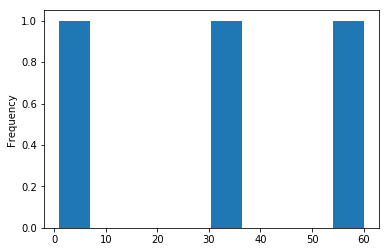